<a href="https://colab.research.google.com/github/YifanSong348/STATS302/blob/main/Week1/Auto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#STATS302 HW 1
###Problem 4. Programming

In [ ]:
import pandas as pd 
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn import metrics 
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# show all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
# import dataset
df_Auto=pd.read_csv('https://raw.githubusercontent.com/YifanSong348/STATS302/main/Week%201/Auto.csv')
df_Auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [ ]:
df_Auto.describe()

,mpg,cylinders,displacement,weight,acceleration,year,origin
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,2970.261965,15.555668,75.994962,1.574307
std,7.825804,1.701577,104.379583,847.904119,2.749995,3.690005,0.802549
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,2223.000000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3609.000000,17.100000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [ ]:
df_Auto.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name'],
      dtype='object')

In [ ]:
df_Auto.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

# a.

In [ ]:
# data wrangling
df_Auto_new = df_Auto.drop([32, 126, 330, 336, 354])
df_Auto_new['mpg'] = df_Auto.mpg.astype(float)
df_Auto_new['horsepower'] = df_Auto_new.horsepower.astype(float)

Simple linear regression result

In [ ]:
# est = smf.ols(y~x, data)
est = smf.ols('mpg~horsepower', data = df_Auto_new).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Thu, 01 Apr 2021   Prob (F-statistic):           7.03e-81
Time:                        11:57:59   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.0

**a. i. Is there a relationship between the predictor and the response ?**

Yes, there is a relationship between horsepower and mpg as we can test the null hypothesis H0:βi=0 ∀i, i.e all regression coefficients are equal to zero. Since the F-statistic is far larger than 1 (599.7) and the p-value of the F-statistic is close to zero (7.03e-81), we can reject the null hypothesis and state there is a statistically significant relationship between horsepower and mpg.


**a. ii. How strong is the relationship between the predictor and the response ?**

The R-squared is equal to 0.606, which means almost 60.6% of the variability in “mpg” can be explained using “horsepower”.

**a. iii. Is the relationship between the predictor and the response positive or negative ?**

As the coefficient of “horsepower” is negative (-0.1578), the relationship  between mpg and horsepower is negative. The more horsepower an automobile has, the linear regression indicates the less mpg fuel efficiency the automobile will have.


In [ ]:
reg = LinearRegression()
reg.fit(df_Auto_new[["horsepower"]], df_Auto_new["mpg"])
yfit = reg.intercept_ + reg.coef_*98
print(yfit)

[24.46707715]


**a. iv. What is the predicted mpg associated with a “horsepower” of 98 ? What are the associated 95% confidence and prediction intervals ?**
Predicted mpg associated with a “horsepower” of 98 is 24.46707715.

# b.

**Approach 1**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


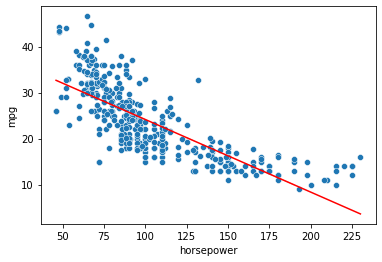

In [ ]:
sns.scatterplot(df_Auto_new['horsepower'], df_Auto_new['mpg'])
sns.lineplot(df_Auto_new['horsepower'], est.fittedvalues, color = 'red')
# plt.abline(y = 0, linewidth = 0.5, linestyle = 'dashed', color = 'red')

#### **Approach 2**

#### Simple Linear Regression

In [ ]:
df_Auto_new['mpg'] = df_Auto.mpg.astype(float)
df_Auto_new['horsepower'] = df_Auto_new.horsepower.astype(float)
X = df_Auto_new[["horsepower"]]
y = df_Auto_new["mpg"]

In [ ]:
# define a regressor
reg = LinearRegression()
reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# calculate beta_1
print("Beta_1 = ", reg.coef_)

Beta_1 =  [-0.15784473]


In [ ]:
# calculate beta_1
print("Beta_0 = ", reg.intercept_)

Beta_0 =  39.93586102117047


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


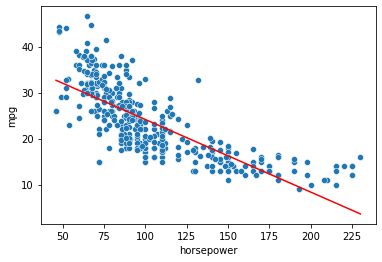

In [ ]:
sns.scatterplot(df_Auto_new['horsepower'], df_Auto_new['mpg'])
df_Auto_new['mpg'] = df_Auto_new.mpg.astype(float)
df_Auto_new['horsepower'] = df_Auto_new.horsepower.astype(float)
yfit = reg.intercept_ + reg.coef_*df_Auto_new['horsepower']
sns.lineplot(df_Auto_new['horsepower'], yfit, color = 'red')

**Approach 3**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


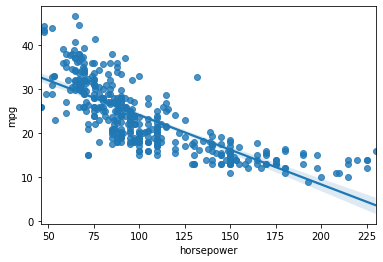

In [ ]:
sns.regplot(df_Auto_new['horsepower'], df_Auto_new['mpg'])

# c.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Residuals')

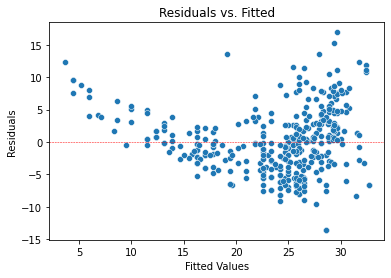

In [ ]:
# dist of residuals
# plt.ylim()
a = sns.scatterplot(est.fittedvalues, est.resid)
plt.axhline(y = 0, linewidth = 0.5, linestyle = 'dashed', color = 'red')
a.set_title('Residuals vs. Fitted')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')

The plot of residuals versus fitted values indicates the presence of non linearity in the data. Looking at the smoothing line of the residuals (ei=yi−yi^) vs the fitted values (yi^), there is a strong pattern in the residuals, indicating non-linearity. 